In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as sts
import statistics as stats
import re

from sklearn import preprocessing

In [55]:
#Dataset PIB

df_1 = pd.read_csv('PIB-municipios-BHRP.csv')
df_1 = df_1[(df_1['Ano'] == 2019)]
df_1.head()

,Ano,Código da Grande Região,Nome da Grande Região,Código da Unidade da Federação,Sigla da Unidade da Federação,Nome da Unidade da Federação,Código do Município,Nome do Município,Região Metropolitana,Código da Mesorregião,...,Valor adicionado bruto da Indústria a preços correntes (R$ 1.000),Valor adicionado bruto dos Serviços a preços correntes - exceto Administração em defesa educação e saúde públicas e seguridade social (R$ 1.000),"Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social a preços correntes (R$ 1.000)",Valor adicionado bruto total a preços correntes (R$ 1.000),"Impostos, líquidos de subsídios, sobre produtos a preços correntes (R$ 1.000)",Produto Interno Bruto a preços correntes (R$ 1.000),"Produto Interno Bruto per capita a preços correntes (R$ 1,00)",Atividade com maior valor adicionado bruto,Atividade com segundo maior valor adicionado bruto,Atividade com terceiro maior valor adicionado bruto
17,2019,3,Sudeste,31,MG,Minas Gerais,3106408,Belo Vale,Região Metropolitana de Belo Horizonte,3107,...,"63,197","51,778","49,607","181,944","6,005","187,949","24,361.53",Indústrias extrativas,"Administração, defesa, educação e saúde públic...",Demais serviços
35,2019,3,Sudeste,31,MG,Minas Gerais,3106705,Betim,Região Metropolitana de Belo Horizonte,3107,...,"11,537,468","9,924,629","2,212,077","23,687,150","4,379,098","28,066,248","63,882.75",Indústrias de transformação,Demais serviços,Comércio e reparação de veículos automotores e...
53,2019,3,Sudeste,31,MG,Minas Gerais,3108107,Bonfim,Região Metropolitana de Belo Horizonte,3107,...,"9,781","41,414","30,739","96,526","5,797","102,323","14,898.51",Demais serviços,"Administração, defesa, educação e saúde públic...","Agricultura, inclusive apoio à agricultura e a..."
71,2019,3,Sudeste,31,MG,Minas Gerais,3109006,Brumadinho,Região Metropolitana de Belo Horizonte,3107,...,"1,041,129","982,042","255,486","2,300,665","215,568","2,516,233","62,744.25",Demais serviços,Indústrias extrativas,"Administração, defesa, educação e saúde públic..."
89,2019,3,Sudeste,31,MG,Minas Gerais,3109600,Cachoeira da Prata,NaN,3107,...,"2,273","18,942","19,154","41,662","5,085","46,748","12,974.72","Administração, defesa, educação e saúde públic...",Demais serviços,Comércio e reparação de veículos automotores e...


In [56]:
#Dataset CAR

df_2 = pd.read_csv('CAR-recursos-naturais-municipios.csv')
df_2.head()

,Nome do Município,APP,Altitude Superior 1800,Consolidada,Declividade Maior 45,Imoveis,Pousio,Topo de Morro,Banhado,Borda Chapada,Hidrografia,Manguezal,Nascentes,Reserva Legal,Restinga,Servidão Administrativa,Restrito,Vegetação Nativa,Vereda
0,Belo Vale,4489,0,844,3,1055,47,2,3,0,948,0,412,859,0,99,0,904,24
1,Betim,2664,0,446,2,741,9,1,3,0,436,0,247,586,0,57,3,637,4
2,Bonfim,6133,0,1749,1,2064,41,1,0,0,1291,0,383,1650,0,413,29,1507,30
3,Brumadinho,7419,0,787,15,1177,44,8,1,0,965,0,726,1025,1,191,23,949,31
4,Cahoeira da Prata,330,0,67,0,61,1,0,1,0,61,0,28,86,0,12,0,113,0


In [57]:
#Dataset IDHM
#https://www.br.undp.org/content/brazil/pt/home/idh0/rankings/idhm-municipios-2010.html

df_3 = pd.read_csv('IDH-cidades.csv')
df_3.head()

,Nome do Município,IDH 2010,IDHM Renda 2010,IDHM Longevidade 2010,IDHM Educação 2010
0,Belo Vale,0.655,0.672,0.814,0.514
1,Betim,0.749,0.709,0.864,0.687
2,Bonfim,0.637,0.669,0.834,0.464
3,Brumadinho,0.747,0.761,0.857,0.639
4,Cachoeira da Prata,0.741,0.689,0.834,0.707


In [58]:
#dataset IBGE

df_4 = pd.read_csv('IBGE-municipios.csv')
df_4.head()

,Nome do Município,População estimada(2021),População censo(2010),Densidade demografica(2010),Salario medio mensal(2019),Pessoal ocupado(2019),Populacao ocupada(2019),Percentual da populacao com renda de ate meio salario(2010),Taxa escolarizacao 6 a 14 anos(2010),IDEB anos finais ensino fundamental(2019),...,Total receitas realizadas(2017),Total receitas empenhadas(2017),Mortalidade infantil(2019),Internacoes por diarreia(2016),Estabelecimentos SUS(2009),Area territorial(2021),Esgotamento adequado(2010),Arborização vias publicas(2010),Urbanizacao vias publicas(2010),Bioma
0,Belo Vale,7723,7536,20.59,1.8,1247,16.2,38.5,97.1,6.3,...,45642.25,32123.19,10.75,0.8,5,365.923,48.2,67.7,27.8,Mata Atlântica
1,Betim,450024,378089,1102.80,3.2,118718,27.0,33.7,98.0,6.1,...,1775733.39,1363402.09,13.06,0.1,73,343.884,86.0,74.3,33.4,Cerrado e Mata Atlântica
2,Bonfim,6852,6818,22.59,1.6,770,11.2,36.8,98.5,5.6,...,19095.87,19887.69,NaN,NaN,4,301.865,38.5,40.9,9.4,Mata Atlântica
3,Brumadinho,41208,33973,53.13,2.2,12330,30.7,33.5,98.4,6.7,...,175543.55,165401.05,17.20,0.3,27,639.434,65.4,59.3,19.5,Mata Atlântica
4,Cachoeira da Prata,3580,3654,59.53,1.6,632,17.5,31.2,98.1,6.2,...,15260.12,12455.95,25.00,NaN,2,61.381,92.6,28.6,7.2,Cerrado


In [59]:
#União dos datasets - merge com pandas

df = pd.merge(df_1, df_2, how='inner', on="Nome do Município")
df = pd.merge(df, df_3, how='inner', on="Nome do Município")
df = pd.merge(df, df_4, how='inner', on="Nome do Município")
df.head()

,Ano,Código da Grande Região,Nome da Grande Região,Código da Unidade da Federação,Sigla da Unidade da Federação,Nome da Unidade da Federação,Código do Município,Nome do Município,Região Metropolitana,Código da Mesorregião,...,Total receitas realizadas(2017),Total receitas empenhadas(2017),Mortalidade infantil(2019),Internacoes por diarreia(2016),Estabelecimentos SUS(2009),Area territorial(2021),Esgotamento adequado(2010),Arborização vias publicas(2010),Urbanizacao vias publicas(2010),Bioma
0,2019,3,Sudeste,31,MG,Minas Gerais,3106408,Belo Vale,Região Metropolitana de Belo Horizonte,3107,...,45642.25,32123.19,10.75,0.8,5,365.923,48.2,67.7,27.8,Mata Atlântica
1,2019,3,Sudeste,31,MG,Minas Gerais,3106705,Betim,Região Metropolitana de Belo Horizonte,3107,...,1775733.39,1363402.09,13.06,0.1,73,343.884,86.0,74.3,33.4,Cerrado e Mata Atlântica
2,2019,3,Sudeste,31,MG,Minas Gerais,3108107,Bonfim,Região Metropolitana de Belo Horizonte,3107,...,19095.87,19887.69,NaN,NaN,4,301.865,38.5,40.9,9.4,Mata Atlântica
3,2019,3,Sudeste,31,MG,Minas Gerais,3109006,Brumadinho,Região Metropolitana de Belo Horizonte,3107,...,175543.55,165401.05,17.20,0.3,27,639.434,65.4,59.3,19.5,Mata Atlântica
4,2019,3,Sudeste,31,MG,Minas Gerais,3114907,Casa Grande,NaN,3107,...,13260.00,11620.03,NaN,1.7,1,157.727,63.8,48.0,8.2,Mata Atlântica


In [60]:
#Tratamento dos dados categóricos do PIB do municipio

from sklearn import preprocessing

le = preprocessing.LabelEncoder()
regiao_metropolitana = le.fit(df_1['Região Metropolitana'])
regiao_metropolitana = le.transform(df_1['Região Metropolitana'])
#print(regiao_metropolitana)

le = preprocessing.LabelEncoder()
hierarquia_urbana = le.fit(df_1['Hierarquia Urbana (principais categorias)'])
hierarquia_urbana = le.transform(df_1['Hierarquia Urbana (principais categorias)'])
#print(hierarquia_urbana)

le = preprocessing.LabelEncoder()
mesorregiao = le.fit(df_1['Nome da Mesorregião'])
mesorregiao = le.transform(df_1['Nome da Mesorregião'])
#print(mesorregiao)

le = preprocessing.LabelEncoder()
microrregiao = le.fit(df_1['Nome da Microrregião'])
microrregiao = le.transform(df_1['Nome da Microrregião'])
#print(microrregiao)

le = preprocessing.LabelEncoder()
regiao_geografica_imediata = le.fit(df_1['Nome da Região Geográfica Imediata'])
regiao_geografica_imediata = le.transform(df_1['Nome da Região Geográfica Imediata'])
#print(regiao_geografica_imediata)

le = preprocessing.LabelEncoder()
regiao_geografica_intermediaria = le.fit(df_1['Nome da Região Geográfica Intermediária'])
regiao_geografica_intermediaria = le.transform(df_1['Nome da Região Geográfica Intermediária'])
#print(regiao_geografica_intermediaria)

le = preprocessing.LabelEncoder()
concentracao_urbana = le.fit(df_1['Nome Concentração Urbana'])
concentracao_urbana = le.transform(df_1['Nome Concentração Urbana'])
#print(concentracao_urbana)

le = preprocessing.LabelEncoder()
tipo_concentracao_urbana = le.fit(df_1['Tipo Concentração Urbana'])
tipo_concentracao_urbana = le.transform(df_1['Tipo Concentração Urbana'])
#print(tipo_concentracao_urbana)

le = preprocessing.LabelEncoder()
arranjo_populacional = le.fit(df_1['Nome Arranjo Populacional'])
arranjo_populacional = le.transform(df_1['Nome Arranjo Populacional'])
#print(arranjo_populacional)

le = preprocessing.LabelEncoder()
regiao_rural = le.fit(df_1['Nome da Região Rural'])
regiao_rural = le.transform(df_1['Nome da Região Rural'])
#print(regiao_rural)

le = preprocessing.LabelEncoder()
regiao_rural_nucleo = le.fit(df_1['Região rural (segundo classificação do núcleo)'])
regiao_rural_nucleo = le.transform(df_1['Região rural (segundo classificação do núcleo)'])
#print(regiao_rural_nucleo)

le = preprocessing.LabelEncoder()
nome_municipio = le.fit(df_1['Nome do Município'])
nome_municipio = le.transform(df_1['Nome do Município'])
#print(nome_municipio)


In [61]:
#Tratamento dos dados numéricos do PIB do municipio

#Valor adicionado bruto dos Serviços a preços correntes - exceto Administração em defesa educação e saúde públicas e seguridade social (R$ 1.000)
agropecuaria = df_1['Valor adicionado bruto da Agropecuária a preços correntes(R$ 1.000)']
industria = df_1['Valor adicionado bruto da Indústria a preços correntes (R$ 1.000)']
servicos = df_1['Valor adicionado bruto dos Serviços a preços correntes - exceto Administração em defesa educação e saúde públicas e seguridade social (R$ 1.000)']

administracao = df_1['Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social a preços correntes (R$ 1.000)']
bruto_total = df_1['Valor adicionado bruto total a preços correntes (R$ 1.000)']
impostos = df_1['Impostos, líquidos de subsídios, sobre produtos a preços correntes (R$ 1.000)']
precos_correntes = df_1['Produto Interno Bruto a preços correntes (R$ 1.000)']
#per_capita = df_1['Produto Interno Bruto per capita a preços correntes (R$ 1.000)']

agropecuaria_f = []
industria_f = []
servicos_f = []
administracao_f = []
bruto_total_f = []
impostos_f = []
precos_correntes_f = []
#per_capita_f = []

for i in agropecuaria:
    #Expressão regex que remove a segunda vírgula
    i = re.sub('(,[^,]*),', r'\1', i)
    #Remove os espaços embranco e troca o ponto por vírgula
    i = i.replace(' ','').replace(',', '.')
    agropecuaria_f.append(float(i))

for i in industria:
    #Expressão regex que remove a segunda vírgula
    i = re.sub('(,[^,]*),', r'\1', i)
    #Remove os espaços embranco e troca o ponto por vírgula
    i = i.replace(' ','').replace(',', '.')
    industria_f.append(float(i))

for i in servicos:
    #Expressão regex que remove a segunda vírgula
    i = re.sub('(,[^,]*),', r'\1', i)
    #Remove os espaços embranco e troca o ponto por vírgula
    i = i.replace(' ','').replace(',', '.')
    servicos_f.append(float(i))

for i in administracao:
    #Expressão regex que remove a segunda vírgula
    i = re.sub('(,[^,]*),', r'\1', i)
    #Remove os espaços embranco e troca o ponto por vírgula
    i = i.replace(' ','').replace(',', '.')
    administracao_f.append(float(i))

for i in bruto_total:
    #Expressão regex que remove a segunda vírgula
    i = re.sub('(,[^,]*),', r'\1', i)
    #Remove os espaços embranco e troca o ponto por vírgula
    i = i.replace(' ','').replace(',', '.')
    bruto_total_f.append(float(i))

for i in impostos:
    #Expressão regex que remove a segunda vírgula
    i = re.sub('(,[^,]*),', r'\1', i)
    #Remove os espaços embranco e troca o ponto por vírgula
    i = i.replace(' ','').replace(',', '.')
    impostos_f.append(float(i))

for i in precos_correntes:
    #Expressão regex que remove a segunda vírgula
    i = re.sub('(,[^,]*),', r'\1', i)
    #Remove os espaços em branco e troca o ponto por vírgula
    i = i.replace(' ','').replace(',', '.')
    precos_correntes_f.append(float(i))

'''
for i in per_capita:
    #Expressão regex que remove a segunda vírgula
    i = re.sub('(,[^,]*),', r'\1', i)
    #Remove os espaços embranco e troca o ponto por vírgula
    i = i.replace(' ','').replace(',', '.')
    per_capita_f.append(float(i))
'''



"\nfor i in per_capita:\n    #Expressão regex que remove a segunda vírgula\n    i = re.sub('(,[^,]*),', r'\x01', i)\n    #Remove os espaços embranco e troca o ponto por vírgula\n    i = i.replace(' ','').replace(',', '.')\n    per_capita_f.append(float(i))\n"

In [62]:
#Tratamento dos dados numéricos do IDH dos Municipios

idh = df_3['IDH 2010']
idh_renda = df_3['IDHM Renda 2010']
idh_longevidade = df_3['IDHM Longevidade 2010']
idh_educacao = df_3['IDHM Educação 2010']

idh_f = []
idh_renda_f = []
idh_longevidade_f = []
idh_educacao_f = []

for i in idh:
    idh_f.append(float(i))

for i in idh_renda:
    idh_renda_f.append(float(i))

for i in idh_longevidade:
    idh_longevidade_f.append(float(i))
    
for i in idh_educacao:
    idh_educacao_f.append(float(i))


In [63]:
#Tratamento dos dados númericos do CAR

app = df_2['APP']
superior_1800 = df_2['Altitude Superior 1800']
consolidade = df_2['Consolidada']
declividade_maior_45 = df_2['Declividade Maior 45']
imoveis = df_2['Imoveis']
pousio = df_2['Pousio']
topo_morro = df_2['Topo de Morro']
banhado = df_2['Banhado']
borda_chapada = df_2['Borda Chapada']
hidrografia = df_2['Hidrografia']
manguezal = df_2['Manguezal']
nascentes = df_2['Nascentes']
reserva_legal = df_2['Reserva Legal']
restinga = df_2['Restinga']
servidao_administrativa = df_2['Servidão Administrativa']
restrito = df_2['Restrito']
vegetacao_nativa = df_2['Vegetação Nativa']
vereda = df_2['Vereda']
                           
app_f = []
superior_1800_f = []
consolidade_f = []
declividade_maior_45_f = []
imoveis_f = []
pousio_f = []
topo_morro_f = []
banhado_f = []
borda_chapada_f = []
hidrografia_f = []
manguezal_f = []
nascentes_f = []
reserva_legal_f = []
restinga_f = []
servidao_administrativa_f = []
restrito_f = []
vegetacao_nativa_f = []
vereda_f = []
                           
for i in app:
    app_f.append(float(i))

for i in superior_1800:
    superior_1800_f.append(float(i))
                           
for i in consolidade:
    consolidade_f.append(float(i))
                           
for i in declividade_maior_45:
    declividade_maior_45_f.append(float(i))
                           
for i in imoveis:
    imoveis_f.append(float(i))
                           
for i in pousio:
    pousio_f.append(float(i))
                           
for i in topo_morro:
    topo_morro_f.append(float(i))
                           
for i in banhado:
    banhado_f.append(float(i))
                           
for i in borda_chapada:
    borda_chapada_f.append(float(i))
                           
for i in hidrografia:
    hidrografia_f.append(float(i))
                           
for i in manguezal:
    manguezal_f.append(float(i))
                           
for i in nascentes:
    nascentes_f.append(float(i))
                           
for i in reserva_legal:
    reserva_legal_f.append(float(i))
                           
for i in restinga:
    restinga_f.append(float(i))
                           
for i in servidao_administrativa:
    servidao_administrativa_f.append(float(i))
                           
for i in restrito:
    restrito_f.append(float(i))
                           
for i in vegetacao_nativa:
    vegetacao_nativa_f.append(float(i))
                           
for i in vereda:
    vereda_f.append(float(i))

In [64]:
#Tratamento dos dados IBGE

populacao_estimada = df_4['População estimada(2021)']
populacao_censo = df_4['População censo(2010)']
densidade_demografica = df_4['Densidade demografica(2010)']
salario_medio = df_4['Salario medio mensal(2019)']
pessoal_ocupado = df_4['Pessoal ocupado(2019)']
populacao_ocupada = df_4['Populacao ocupada(2019)']
percentual_renda_meio_salario = df_4['Percentual da populacao com renda de ate meio salario(2010)']
taxa_escolarizacao = df_4['Taxa escolarizacao 6 a 14 anos(2010)']
IDEB_ensino_fundamental = df_4['IDEB anos finais ensino fundamental(2019)']
IDEB_ensino_medio = df_4['IDEB anos finais ensino fundamental(2019)']
docentes_ensino_fundamental = df_4['Docentes ensino fundamental(2020)']
docentes_ensino_medio = df_4['Docentes ensino medio(2020)']
numero_escolas_ensino_fundamental = df_4['Numeros estabelecimentos ensino fundamental(2010)']
numero_escolas_ensino_medio = df_4['Numeros estabelecimentos ensino medio(2020)']
pib = df_4['PIB per capita(2019)']
receitas_externas = df_4['Percentual receitas fontes externas(2015)']
IDHM = df_4['IDHM(2010)']
total_receitas_realizadas = df_4['Total receitas realizadas(2017)']
total_receitas_empenhadas = df_4['Total receitas empenhadas(2017)']
mortalidade_infantil = df_4['Mortalidade infantil(2019)']
internacoes_diarreias = df_4['Internacoes por diarreia(2016)']
SUS = df_4['Estabelecimentos SUS(2009)']
area = df_4['Area territorial(2021)']
esgotamento = df_4['Esgotamento adequado(2010)']
arborizacao = df_4['Arborização vias publicas(2010)']
urbanizacao = df_4['Urbanizacao vias publicas(2010)']
bioma = df_4['Bioma']

populacao_estimada_f = []
populacao_censo_f = []
densidade_demografica_f = []
salario_medio_f = []
pessoal_ocupado_f = []
populacao_ocupada_f = []
percentual_renda_meio_salario_f = []
taxa_escolarizacao_f = []
IDEB_ensino_fundamental_f = []
IDEB_ensino_medio_f = []
docentes_ensino_fundamental_f = []
docentes_ensino_medio_f = []
numero_escolas_ensino_fundamental_f = []
numero_escolas_ensino_medio_f = []
pib_f = []
receitas_externas_f = []
IDHM_f = []
total_receitas_realizadas_f = []
total_receitas_empenhadas_f = [] 
mortalidade_infantil_f = [] 
internacoes_diarreias_f = []
SUS_f = []
area_f = []
esgotamento_f = []
arborizacao_f = []
urbanizacao_f = []
bioma_f = [] 

for i in populacao_estimada:
    populacao_estimada_f.append(float(i))
    
for i in populacao_censo:
    populacao_censo_f.append(float(i))
    
for i in densidade_demografica:
    densidade_demografica_f.append(float(i))
    
for i in salario_medio:
    salario_medio_f.append(float(i))
    
for i in pessoal_ocupado:
    pessoal_ocupado_f.append(float(i))
    
for i in populacao_ocupada:
    populacao_ocupada_f.append(float(i))
    
for i in percentual_renda_meio_salario:
    percentual_renda_meio_salario_f.append(float(i))

for i in taxa_escolarizacao:
    taxa_escolarizacao_f.append(float(i))

for i in IDEB_ensino_fundamental:
    IDEB_ensino_fundamental_f.append(float(i))

for i in IDEB_ensino_medio:
    IDEB_ensino_medio_f.append(float(i))
    
for i in docentes_ensino_fundamental:
    docentes_ensino_fundamental_f.append(float(i))
    
for i in docentes_ensino_medio:
    docentes_ensino_medio_f.append(float(i))
    
for i in numero_escolas_ensino_fundamental:
    numero_escolas_ensino_fundamental_f.append(float(i))
    
for i in numero_escolas_ensino_medio:
    numero_escolas_ensino_medio_f.append(float(i))
    
for i in pib:
    pib_f.append(float(i))
    
for i in receitas_externas:
    receitas_externas_f.append(float(i))
    
for i in IDHM:
    IDHM_f.append(float(i))
    
for i in total_receitas_realizadas:
    total_receitas_realizadas_f .append(float(i))

for i in total_receitas_empenhadas:
    total_receitas_empenhadas_f.append(float(i))
    
for i in mortalidade_infantil:
    mortalidade_infantil_f.append(float(i))
    
for i in internacoes_diarreias:
    internacoes_diarreias_f.append(float(i))
    
for i in SUS:
    SUS_f.append(float(i))
    
for i in area:
    area_f.append(float(i))
    
for i in esgotamento:
    esgotamento_f.append(float(i))
    
for i in arborizacao:
    arborizacao_f.append(float(i))
    
for i in urbanizacao:
    urbanizacao_f.append(float(i))

le = preprocessing.LabelEncoder()
bioma_f = le.fit(df_4['Bioma'])
bioma_f = le.transform(df_4['Bioma'])


In [65]:
#aux = dimensão > 2
aux = []

for i in range(1,48):
    t = []
    #PIB dos municipios
    #t.append(nome_municipio[i])
    t.append(regiao_metropolitana[i])
    t.append(hierarquia_urbana[i])
    t.append(mesorregiao[i])
    t.append(microrregiao[i])
    t.append(regiao_geografica_imediata[i])
    t.append(regiao_geografica_intermediaria[i])
    t.append(concentracao_urbana[i])
    t.append(tipo_concentracao_urbana[i])
    t.append(arranjo_populacional[i])
    t.append(regiao_rural[i])
    t.append(regiao_rural_nucleo[i])
    t.append(agropecuaria_f[i])
    t.append(industria_f[i])
    t.append(servicos_f[i])
    t.append(administracao_f[i])
    t.append(bruto_total_f[i])
    t.append(impostos_f[i])
    t.append(precos_correntes_f[i])
    
    #CAR
    t.append(app_f [i])
    t.append(superior_1800_f[i])
    t.append(consolidade_f[i])
    t.append(declividade_maior_45_f[i])
    t.append(imoveis_f[i])
    t.append(pousio_f[i])
    t.append(topo_morro_f[i])
    t.append(banhado_f[i])
    t.append(borda_chapada_f[i])
    t.append(hidrografia_f[i])
    t.append(manguezal_f[i])
    t.append(nascentes_f[i])
    t.append(reserva_legal_f[i])
    t.append(restinga[i])
    t.append(servidao_administrativa_f[i])
    t.append(restrito_f[i])
    t.append(vegetacao_nativa[i])
    t.append(vereda[i])                        
    #IDH
    t.append(idh_f[i])
    t.append(idh_renda_f[i])
    t.append(idh_longevidade_f[i])
    t.append(idh_educacao_f[i])
    #IBGE
    t.append(populacao_estimada_f[i])
    t.append(populacao_censo_f[i])
    t.append(densidade_demografica_f[i])
    t.append(salario_medio_f[i])
    t.append(pessoal_ocupado_f[i])
    t.append(populacao_ocupada_f[i])
    t.append(percentual_renda_meio_salario_f[i])
    t.append(taxa_escolarizacao_f[i])
    #t.append(IDEB_ensino_fundamental_f[i])
    #t.append(IDEB_ensino_medio_f[i])
    t.append(docentes_ensino_fundamental_f[i])
    t.append(docentes_ensino_medio_f[i])
    t.append(numero_escolas_ensino_fundamental_f[i])
    t.append(numero_escolas_ensino_medio_f[i])
    #t.append(receitas_externas_f[i])
    t.append(pib_f[i])
    t.append(IDHM_f[i])
    t.append(total_receitas_realizadas_f[i])
    t.append(total_receitas_empenhadas_f[i])
    #t.append(mortalidade_infantil_f[i])
    #t.append(internacoes_diarreias_f[i])
    t.append(SUS_f[i])
    t.append(area_f[i])
    t.append(esgotamento_f[i])
    t.append(arborizacao_f[i])
    t.append(urbanizacao_f[i])
    t.append(bioma_f[i])
    
    aux.append(t)
print(aux)

[[0, 3, 2, 0, 0, 1, 0, 0, 0, 1, 1, 12.977, 11.537468, 9.924629, 2.212077, 23.68715, 4.379098, 28.066248, 2664.0, 0.0, 446.0, 2.0, 741.0, 9.0, 1.0, 3.0, 0.0, 436.0, 0.0, 247.0, 586.0, 0, 57.0, 3.0, 637, 4, 0.749, 0.709, 0.864, 0.687, 450024.0, 378089.0, 1102.8, 3.2, 118718.0, 27.0, 33.7, 98.0, 2812.0, 958.0, 118.0, 37.0, 63882.75, 0.749, 1775733.39, 1363402.09, 73.0, 343.884, 86.0, 74.3, 33.4, 2], [0, 0, 2, 4, 5, 2, 3, 2, 6, 1, 1, 14.592, 9.781, 41.414, 30.739, 96.526, 5.797, 102.323, 6133.0, 0.0, 1749.0, 1.0, 2064.0, 41.0, 1.0, 0.0, 0.0, 1291.0, 0.0, 383.0, 1650.0, 0, 413.0, 29.0, 1507, 30, 0.637, 0.669, 0.834, 0.464, 6852.0, 6818.0, 22.59, 1.6, 770.0, 11.2, 36.8, 98.5, 44.0, 19.0, 4.0, 1.0, 14898.51, 0.637, 19095.87, 19887.69, 4.0, 301.865, 38.5, 40.9, 9.4, 3], [0, 3, 2, 0, 0, 1, 0, 0, 0, 1, 1, 22.008, 1.041129, 982.042, 255.486, 2.300665, 215.568, 2.516233, 7419.0, 0.0, 787.0, 15.0, 1177.0, 44.0, 8.0, 1.0, 0.0, 965.0, 0.0, 726.0, 1025.0, 1, 191.0, 23.0, 949, 31, 0.747, 0.761, 0.857, 

In [64]:
#Identificando os valores NaN
import math
pos = 0

for i in aux:
    for j in i:
        pos = pos + 1
        if math.isnan(j):
            print(pos)
    pos = 0

56
61
62
56
56
62
61
61
56
61
56
56
56
62
62
56
56
61
61
62
56
62
61
56
61
50
51
61
61
56
61
61
61


C:\Users\T.i\anaconda3-2\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


1 11750155214261.309
2 1687064067961.792
3 608776377556.9397
4 418864092657.1412
5 436383227337.66113
6 292043351997.60046
7 289063672357.5182
8 168390789761.03674
9 140693463970.88327
10 144244017592.45135


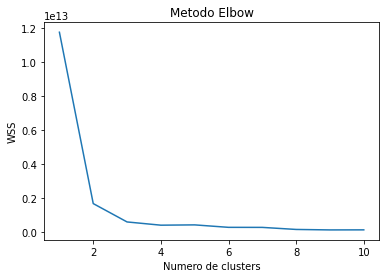

In [66]:
#Método Elbow: Encontrando um valor ideal para o número de clusters

from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(aux)
    print(i, kmeans.inertia_)
    wcss.append(kmeans.inertia_)

#Gráfico da variância em relação ao número de clusters
#Lembrando: maior a variância, maior a dispersão dos dados
plt.plot(range(1,11), wcss)
plt.title('Metodo Elbow')
plt.xlabel('Numero de clusters')
plt.ylabel('WSS') #withim cluster sum of squares
plt.show()

In [67]:
#Silhouette Score
#Valor varia entre -1 e +1
#1: Clusters bem mais separados e com valores melhor definidos
#0: Distância entre os clusters formados não é significativa
#-1: Valores dos clusters errados

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

valores_silhouette_scores = []

for i in range(2,15):
    km = KMeans(n_clusters = i, random_state = 42)
    km.fit_predict(aux)
    score = silhouette_score(aux, km.labels_, metric='euclidean')
    
    x = []
    x.append(i)
    x.append(score)
    valores_silhouette_scores.append(x)

print(valores_silhouette_scores)


[[2, 0.9118537959621514], [3, 0.7403130965250999], [4, 0.7136543926025132], [5, 0.6835105095295227], [6, 0.5728101719856347], [7, 0.6168262037552819], [8, 0.5916659557976403], [9, 0.5887136468931917], [10, 0.5837740036730023], [11, 0.5766127688216806], [12, 0.5692809764668734], [13, 0.5144788532207654], [14, 0.5263516970355844]]


In [74]:
from sklearn.cluster import KMeans
import numpy as np

#Calculando os clusters
kmeans = KMeans(n_clusters = 2, random_state = 0)
cluster = kmeans.fit_predict(aux)

print(cluster)


[1 0 0 0 0 0 2 2 1 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 2 0 0
 0 0 0 0 0 0 0 0 0 2]


In [75]:
#PCA = transforma de n dimensões para uma dimensão m, com n > m

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pcaTransformacao = pca.fit_transform(aux)

print(pcaTransformacao)


[[ 2.08114469e+06  1.72727910e+05]
 [-1.99318304e+05 -5.60851090e+03]
 [ 1.79852892e+04  3.39529544e+04]
 [-2.08122353e+05 -3.96710643e+03]
 [-1.92274925e+05 -3.58851822e+03]
 [-2.10603998e+05  9.83572512e+02]
 [ 2.85908970e+05  7.00279262e+04]
 [ 1.19687526e+05 -6.00387707e+04]
 [ 2.30841219e+06 -1.42311994e+05]
 [-2.04269934e+05  2.22452802e+02]
 [-2.03534864e+05 -3.65357414e+03]
 [ 1.47502538e+04 -3.30756365e+04]
 [-2.02897492e+05  1.85610279e+02]
 [-1.85189871e+05 -1.02737607e+04]
 [-5.00467084e+04 -3.83113345e+04]
 [-1.71886079e+05 -5.56175152e+03]
 [-1.97427565e+05 -4.13046979e+03]
 [-2.07862076e+05 -3.22486293e+03]
 [ 2.78548597e+05 -6.44273791e+04]
 [-9.59006710e+04 -1.60827214e+04]
 [-1.97538939e+05 -2.20381000e+03]
 [-1.39793702e+05  7.91913863e+04]
 [ 1.52440392e+05 -3.43703048e+03]
 [-2.07882579e+05 -7.43282580e+03]
 [-1.56706046e+05  1.28546980e+05]
 [-7.58198760e+04  2.47403316e+04]
 [-1.83066027e+05 -3.65638481e+03]
 [-1.99575445e+05 -2.98208433e+03]
 [-1.72123589e+05 -1

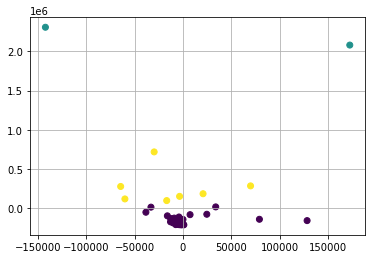

In [76]:
import matplotlib.pyplot as plt

plt.scatter(pcaTransformacao[:,1], pcaTransformacao[:,0], c=cluster)
plt.grid()
#plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,0], s=70, c='red') #posicao do centroide do agrupamento
plt.show()

In [42]:
#Pegando os centroides de cada cluster
centroids = kmeans.cluster_centers_
print(len(centroids))

12


In [11]:
#Mostrar valores separados por cluster

from collections import Counter
print(Counter(cluster))


Counter({0: 45, 1: 2})


In [12]:
#Mostrar o nome das cidades por cluster

#Verificar se essa relação é correta
cidades = {
    '0':'Belo Vale',
    '1':'Betim',
    '2':'Bonfim',
    '3':'Brumadinho',
    '4':'Cachoeira da Prata',
    '5':'Caetanópolis',
    '6':'Casa Grande',
    '7':'Congonhas',
    '8':'Conselheiro Lafaiete',
    '9':'Contagem',
    '10':'Cristiano Otoni',
    '11':'Crucilândia',
    '12':'Curvelo',
    '13':'Desterro de Entre Rios',
    '14':'Entre Rios de Minas',
    '15':'Esmeraldas',
    '16':'Felixlândia',
    '17':'Florestal',
    '18':'Fortuna de Minas',
    '19':'Ibirité',
    '20':'Igarapé',
    '21':'Inhaúma',
    '22':'Itatiaiuçu',
    '23':'Itaúna',
    '24':'Itaverava',
    '25':'Jeceaba',
    '26':'Juatuba',
    '27':'Lagoa Dourada',
    '28':'Maravilhas',
    '29':'Mario Campos',
    '30':'Mateus Leme',
    '31':'Moeda',
    '32':'Ouro Branco',
    '33':'Ouro Preto',
    '34':'Papagaios',
    '35':'Pará de Minas',
    '36':'Paraopeba',
    '37':'Pequi',
    '38':'Piedade dos Gerais',
    '39':'Pompéu',
    '40':'Queluzito',
    '41':'Resende Costa',
    '42':'Rio Manso',
    '43':'São Brás do Suaçuí',
    '44':'São Joaquim de Bicas',
    '45':'São José da Varginha',
    '46':'Sarzedo',
    '47':'Sete Lagoas'
}

city = []
c0 = [] #Representa o cluster 0
c1 = [] #Representa o cluster 1
c2 = [] #Representa o cluster 2
c3 = [] #Representa o cluster 3
c4 = [] #Representa o cluster 4
c5 = [] #Representa o cluster 5
c6 = [] #Representa o cluster 6

j = 0 #Contador auxiliar para andar no vetor com os nomes das cidades

#Para cada id que representa uma cidade, eu adiciona no vetor "cidades"

for i in cidades:
    city.append(cidades[i])

#Para cada valor i do "cluster", tem-se o nome da cidade i
#Com isso, é feito um map do nome da cidade com cluster que ela pertence
for i in cluster:
    if i == 0:
        c0.append(city[j])
    elif i == 1:
        c1.append(city[j])
    elif i == 2:
        c2.append(city[j])
    elif i == 3:
        c3.append(city[j])
    elif i == 4:
        c4.append(city[j])
    elif i == 5:
        c5.append(city[j])
    elif i == 6:
        c6.append(city[j])
    
    j = j + 1
    
print(c0)
print(c1)
print(c2)
print(c3)
print(c4)
print(c5)
print(c6)



['Betim', 'Bonfim', 'Brumadinho', 'Cachoeira da Prata', 'Caetanópolis', 'Casa Grande', 'Congonhas', 'Contagem', 'Cristiano Otoni', 'Crucilândia', 'Curvelo', 'Desterro de Entre Rios', 'Entre Rios de Minas', 'Esmeraldas', 'Felixlândia', 'Florestal', 'Fortuna de Minas', 'Ibirité', 'Igarapé', 'Inhaúma', 'Itatiaiuçu', 'Itaúna', 'Itaverava', 'Jeceaba', 'Juatuba', 'Lagoa Dourada', 'Maravilhas', 'Mario Campos', 'Mateus Leme', 'Moeda', 'Ouro Branco', 'Ouro Preto', 'Papagaios', 'Pará de Minas', 'Paraopeba', 'Pequi', 'Piedade dos Gerais', 'Pompéu', 'Queluzito', 'Resende Costa', 'Rio Manso', 'São Brás do Suaçuí', 'São Joaquim de Bicas', 'São José da Varginha', 'Sarzedo']
['Belo Vale', 'Conselheiro Lafaiete']
[]
[]
[]
[]
[]


In [89]:
#Para cada um dos clusters formados, busca-se em cada um dos datasets os dados para análise
#Dataset IDH
c0_idh = []
c0_renda = []
c0_longevidade = []

c1_idh = []
c1_renda = []
c1_longevidade = []

print("Cluster C0:")
for i in c0:
    x = df_3[(df_3['Nome do Município'] == i)]
    c0_idh.append(float(x['IDH 2010']))
    c0_renda.append(float(x['IDHM Renda 2010']))
    c0_longevidade.append(float(x['IDHM Longevidade 2010']))

print("Média IDH: ", stats.mean(c0_idh))
print("Média IDH Renda: ",stats.mean(c0_renda))
print("Média IDH Longevidade: ",stats.mean(c0_longevidade))
print("\n")
print("Mediana IDH: ", stats.median(c0_idh))
print("Mediana IDH Renda: ",stats.median(c0_renda))
print("MedianaIDH Longevidade: ",stats.median(c0_longevidade))
print("\n")
print("Moda IDH: ", stats.mode(c0_idh))
print("Moda IDH Renda: ",stats.mode(c0_renda))
print("Moda IDH Longevidade: ",stats.mode(c0_longevidade))

print("\n")
print("Cluster C1:")
for i in c1:
    x = df_3[(df_3['Nome do Município'] == i)]
    c1_idh.append(float(x['IDH 2010']))
    c1_renda.append(float(x['IDHM Renda 2010']))
    c1_longevidade.append(float(x['IDHM Longevidade 2010']))

print("Média IDH: ", stats.mean(c1_idh))
print("Média IDH Renda: ",stats.mean(c1_renda))
print("Média IDH Longevidade: ",stats.mean(c1_longevidade))
print("\n")
print("Mediana IDH: ", stats.median(c1_idh))
print("Mediana IDH Renda: ",stats.median(c1_renda))
print("MedianaIDH Longevidade: ",stats.median(c1_longevidade))
print("\n")
print("Moda IDH: ", stats.mode(c1_idh))
print("Moda IDH Renda: ",stats.mode(c1_renda))
print("Moda IDH Longevidade: ",stats.mode(c1_longevidade))

Cluster C0:
Média IDH:  0.6915652173913044
Média IDH Renda:  0.6782608695652174
Média IDH Longevidade:  0.8336739130434783


Mediana IDH:  0.6915
Mediana IDH Renda:  0.673
MedianaIDH Longevidade:  0.834


Moda IDH:  0.704
Moda IDH Renda:  0.672
Moda IDH Longevidade:  0.845


Cluster C1:
Média IDH:  0.7525
Média IDH Renda:  0.727
Média IDH Longevidade:  0.848


Mediana IDH:  0.7525
Mediana IDH Renda:  0.727
MedianaIDH Longevidade:  0.848


Moda IDH:  0.749
Moda IDH Renda:  0.709
Moda IDH Longevidade:  0.864


In [116]:
#Para cada um dos clusters formados, busca-se em cada um dos datasets os dados para análise
#Dataset CAR
import math

c0_app = []
c0_altitude_superior_1800 = []
c0_consolidada = []
c0_declividade = []
c0_imoveis = []
c0_pousio = []
c0_topo_morro = []
c0_banhado = []
c0_borda_chapada = []
c0_hidrografia = []
c0_manguezal = []
c0_nascentes = []
c0_reserva_legal = []
c0_restinga = []
c0_servidao_administrativa = []
c0_restrito = []
c0_vegetacao_nativa = []
c0_vereda = []

c1_app = []
c1_altitude_superior_1800 = []
c1_consolidada = []
c1_declividade = []
c1_imoveis = []
c1_pousio = []
c1_topo_morro = []
c1_banhado = []
c1_borda_chapada = []
c1_hidrografia = []
c1_manguezal = []
c1_nascentes = []
c1_reserva_legal = []
c1_restinga = []
c1_servidao_administrativa = []
c1_restrito = []
c1_vegetacao_nativa = []
c1_vereda = []


print("Cluster C0:")
for i in c0:
    x = df_2[(df_2['Nome do Município'] == i)]
    c0_app.append(int(x['APP']))
    c0_altitude_superior_1800.append(int(x['Altitude Superior 1800']))
    c0_consolidada.append(int(x['Consolidada']))
    c0_declividade.append(int(x['Declividade Maior 45']))
    c0_imoveis.append(int(x['Imoveis']))
    c0_pousio.append(int(x['Pousio']))
    c0_topo_morro.append(int(x['Topo de Morro']))
    c0_banhado.append(int(x['Banhado']))
    c0_borda_chapada.append(int(x['Borda Chapada']))
    c0_hidrografia.append(int(x['Hidrografia']))
    c0_manguezal.append(int(x['Manguezal']))
    c0_nascentes.append(int(x['Nascentes']))
    c0_reserva_legal.append(int(x['Reserva Legal']))
    c0_restinga.append(int(x['Restinga']))
    c0_servidao_administrativa.append(int(x['Servidão Administrativa']))
    c0_restrito.append(int(x['Restrito']))
    c0_vegetacao_nativa.append(int(x['Vegetação Nativa']))
    c0_vereda.append(int(x['Vereda']))

print("Média APP: ", math.ceil(stats.mean(c0_app)))
print("Média Altitude Superior 1800: ", math.ceil(stats.mean(c0_altitude_superior_1800)))
print("Média Consolidada: ", math.ceil(stats.mean(c0_consolidada)))
print("Média Declividade: ", math.ceil(stats.mean(c0_declividade)))
print("Média Imoveis: ", math.ceil(stats.mean(c0_imoveis)))
print("Média Pousio: ", math.ceil(stats.mean(c0_pousio)))
print("Média Topo Morro: ", math.ceil(stats.mean(c0_topo_morro)))
print("Média Banhado: ", math.ceil(stats.mean(c0_banhado)))
print("Média Borda Chapada: ", math.ceil(stats.mean(c0_borda_chapada)))
print("Média Hidrografia: ", math.ceil(stats.mean(c0_hidrografia)))
print("Média Nascentes: ", math.ceil(stats.mean(c0_nascentes)))
print("Média Reserva Legal: ", math.ceil(stats.mean(c0_reserva_legal)))
print("Média Restinga: ", math.ceil(stats.mean(c0_restinga)))
print("Média Servidão Administrativa: ", math.ceil(stats.mean(c0_servidao_administrativa
)))
print("Média Restrito: ", math.ceil(stats.mean(c0_restrito)))
print("Média Vegetação Nativa: ", math.ceil(stats.mean(c0_vegetacao_nativa)))
print("Média Vereda: ", math.ceil(stats.mean(c0_vereda)))
print("\n")

print("Mediana APP: ", math.ceil(stats.median(c0_app)))
print("Mediana Altitude Superior 1800: ", math.ceil(stats.median(c0_altitude_superior_1800)))
print("Mediana Consolidada: ", math.ceil(stats.median(c0_consolidada)))
print("Mediana Declividade: ", math.ceil(stats.median(c0_declividade)))
print("Mediana Imoveis: ", math.ceil(stats.median(c0_imoveis)))
print("Mediana Pousio: ", math.ceil(stats.median(c0_pousio)))
print("Mediana Topo Morro: ", math.ceil(stats.median(c0_topo_morro)))
print("Mediana Banhado: ", math.ceil(stats.median(c0_banhado)))
print("Mediana Borda Chapada: ", math.ceil(stats.median(c0_borda_chapada)))
print("Mediana Hidrografia: ", math.ceil(stats.median(c0_hidrografia)))
print("Mediana Nascentes: ", math.ceil(stats.median(c0_nascentes)))
print("Mediana Reserva Legal: ", math.ceil(stats.median(c0_reserva_legal)))
print("Mediana Restinga: ", math.ceil(stats.median(c0_restinga)))
print("Mediana Servidão Administrativa: ", math.ceil(stats.median(c0_servidao_administrativa
)))
print("Mediana Restrito: ", math.ceil(stats.median(c0_restrito)))
print("Mediana Vegetação Nativa: ", math.ceil(stats.median(c0_vegetacao_nativa)))
print("Mediana Vereda: ", math.ceil(stats.median(c0_vereda)))
print("\n")

print("Moda APP: ", math.ceil(stats.mode(c0_app)))
print("Moda Altitude Superior 1800: ", math.ceil(stats.mode(c0_altitude_superior_1800)))
print("Moda Consolidada: ", math.ceil(stats.mode(c0_consolidada)))
print("Moda Declividade: ", math.ceil(stats.mode(c0_declividade)))
print("Moda Imoveis: ", math.ceil(stats.mode(c0_imoveis)))
print("Moda Pousio: ", math.ceil(stats.mode(c0_pousio)))
print("Moda Topo Morro: ", math.ceil(stats.mode(c0_topo_morro)))
print("Moda Banhado: ", math.ceil(stats.mode(c0_banhado)))
print("Moda Borda Chapada: ", math.ceil(stats.mode(c0_borda_chapada)))
print("Moda Hidrografia: ", math.ceil(stats.mode(c0_hidrografia)))
print("Moda Nascentes: ", math.ceil(stats.mode(c0_nascentes)))
print("Moda Reserva Legal: ", math.ceil(stats.mode(c0_reserva_legal)))
print("Moda Restinga: ", math.ceil(stats.mode(c0_restinga)))
print("Moda Servidão Administrativa: ", math.ceil(stats.mode(c0_servidao_administrativa
)))
print("Moda Restrito: ", math.ceil(stats.mode(c0_restrito)))
print("Moda Vegetação Nativa: ", math.ceil(stats.mode(c0_vegetacao_nativa)))
print("Moda Vereda: ", math.ceil(stats.mode(c0_vereda)))

print("\n")
print("Cluster C1:")
y = 0
for i in c1:
    x = df_2[(df_2['Nome do Município'] == i)]
    
    c1_app.append(int(x['APP']))
    c1_altitude_superior_1800.append(int(x['Altitude Superior 1800']))
    c1_consolidada.append(int(x['Consolidada']))
    c1_declividade.append(int(x['Declividade Maior 45']))
    c1_imoveis.append(int(x['Imoveis']))
    c1_pousio.append(int(x['Pousio']))
    c1_topo_morro.append(int(x['Topo de Morro']))
    c1_banhado.append(int(x['Banhado']))
    c1_borda_chapada.append(int(x['Borda Chapada']))
    c1_hidrografia.append(int(x['Hidrografia']))
    c1_manguezal.append(int(x['Manguezal']))
    c1_nascentes.append(int(x['Nascentes']))
    c1_reserva_legal.append(int(x['Reserva Legal']))
    c1_restinga.append(int(x['Restinga']))
    c1_servidao_administrativa.append(int(x['Servidão Administrativa']))
    c1_restrito.append(int(x['Restrito']))
    c1_vegetacao_nativa.append(int(x['Vegetação Nativa']))
    c1_vereda.append(int(x['Vereda']))

print("Média APP: ", math.ceil(stats.mean(c1_app)))
print("Média Altitude Superior 1800: ", math.ceil(stats.mean(c1_altitude_superior_1800)))
print("Média Consolidada: ", math.ceil(stats.mean(c1_consolidada)))
print("Média Declividade: ", math.ceil(stats.mean(c1_declividade)))
print("Média Imoveis: ", math.ceil(stats.mean(c1_imoveis)))
print("Média Pousio: ", math.ceil(stats.mean(c1_pousio)))
print("Média Topo Morro: ", math.ceil(stats.mean(c1_topo_morro)))
print("Média Banhado: ", math.ceil(stats.mean(c1_banhado)))
print("Média Borda Chapada: ", math.ceil(stats.mean(c1_borda_chapada)))
print("Média Hidrografia: ", math.ceil(stats.mean(c1_hidrografia)))
print("Média Nascentes: ", math.ceil(stats.mean(c1_nascentes)))
print("Média Reserva Legal: ", math.ceil(stats.mean(c1_reserva_legal)))
print("Média Restinga: ", math.ceil(stats.mean(c1_restinga)))
print("Média Servidão Administrativa: ", math.ceil(stats.mean(c1_servidao_administrativa
)))
print("Média Restrito: ", math.ceil(stats.mean(c1_restrito)))
print("Média Vegetação Nativa: ", math.ceil(stats.mean(c1_vegetacao_nativa)))
print("Média Vereda: ", math.ceil(stats.mean(c1_vereda)))
print("\n")

print("Mediana APP: ", math.ceil(stats.median(c1_app)))
print("Mediana Altitude Superior 1800: ", math.ceil(stats.median(c1_altitude_superior_1800)))
print("Mediana Consolidada: ", math.ceil(stats.median(c1_consolidada)))
print("Mediana Declividade: ", math.ceil(stats.median(c1_declividade)))
print("Mediana Imoveis: ", math.ceil(stats.median(c1_imoveis)))
print("Mediana Pousio: ", math.ceil(stats.median(c1_pousio)))
print("Mediana Topo Morro: ", math.ceil(stats.median(c1_topo_morro)))
print("Mediana Banhado: ", math.ceil(stats.median(c1_banhado)))
print("Mediana Borda Chapada: ", math.ceil(stats.median(c1_borda_chapada)))
print("Mediana Hidrografia: ", math.ceil(stats.median(c1_hidrografia)))
print("Mediana Nascentes: ", math.ceil(stats.median(c1_nascentes)))
print("Mediana Reserva Legal: ", math.ceil(stats.median(c1_reserva_legal)))
print("Mediana Restinga: ", math.ceil(stats.median(c1_restinga)))
print("Mediana Servidão Administrativa: ", math.ceil(stats.median(c1_servidao_administrativa
)))
print("Mediana Restrito: ", math.ceil(stats.median(c1_restrito)))
print("Mediana Vegetação Nativa: ", math.ceil(stats.median(c1_vegetacao_nativa)))
print("Mediana Vereda: ", math.ceil(stats.median(c1_vereda)))
print("\n")

print("Moda APP: ", math.ceil(stats.mode(c1_app)))
print("Moda Altitude Superior 1800: ", math.ceil(stats.mode(c1_altitude_superior_1800)))
print("Moda Consolidada: ", math.ceil(stats.mode(c1_consolidada)))
print("Moda Declividade: ", math.ceil(stats.mode(c1_declividade)))
print("Moda Imoveis: ", math.ceil(stats.mode(c1_imoveis)))
print("Moda Pousio: ", math.ceil(stats.mode(c1_pousio)))
print("Moda Topo Morro: ", math.ceil(stats.mode(c1_topo_morro)))
print("Moda Banhado: ", math.ceil(stats.mode(c1_banhado)))
print("Moda Borda Chapada: ", math.ceil(stats.mode(c1_borda_chapada)))
print("Moda Hidrografia: ", math.ceil(stats.mode(c1_hidrografia)))
print("Moda Nascentes: ", math.ceil(stats.mode(c1_nascentes)))
print("Moda Reserva Legal: ", math.ceil(stats.mode(c1_reserva_legal)))
print("Moda Restinga: ", math.ceil(stats.mode(c1_restinga)))
print("Moda Servidão Administrativa: ", math.ceil(stats.mode(c1_servidao_administrativa
)))
print("Moda Restrito: ", math.ceil(stats.mode(c1_restrito)))
print("Moda Vegetação Nativa: ", math.ceil(stats.mode(c1_vegetacao_nativa)))
print("Moda Vereda: ", math.ceil(stats.mode(c1_vereda)))

Cluster C0:
Média APP:  7956
Média Altitude Superior 1800:  0
Média Consolidada:  1459
Média Declividade:  6
Média Imoveis:  1610
Média Pousio:  43
Média Topo Morro:  7
Média Banhado:  10
Média Borda Chapada:  1
Média Hidrografia:  1358
Média Nascentes:  609
Média Reserva Legal:  1617
Média Restinga:  5
Média Servidão Administrativa:  270
Média Restrito:  56
Média Vegetação Nativa:  1631
Média Vereda:  13


Mediana APP:  7419
Mediana Altitude Superior 1800:  0
Mediana Consolidada:  1503
Mediana Declividade:  4
Mediana Imoveis:  1533
Mediana Pousio:  41
Mediana Topo Morro:  3
Mediana Banhado:  2
Mediana Borda Chapada:  0
Mediana Hidrografia:  1412
Mediana Nascentes:  474
Mediana Reserva Legal:  1601
Mediana Restinga:  0
Mediana Servidão Administrativa:  263
Mediana Restrito:  29
Mediana Vegetação Nativa:  1701
Mediana Vereda:  10


Moda APP:  6133
Moda Altitude Superior 1800:  0
Moda Consolidada:  1749
Moda Declividade:  1
Moda Imoveis:  2064
Moda Pousio:  41
Moda Topo Morro:  1
Moda Ba

In [20]:
#Dataset IBGE

c0_populacao_estimada = []
c0_populacao_censo = []
c0_densidade_demografica = []
c0_salario_medio_mensal = []
c0_pessoal_ocupado = []
c0_populacao_ocupada = []
c0_populacao_renda_meio_salario = []
c0_taxa_escolarizacao_6_14 = []
c0_ideb_anos_finais_ensino_medio = []
c0_ideb_anos_finais_ensino_fundamental = []
c0_matriculas_ensino_fundamental = []
c0_matriculas_ensino_medio = []
c0_docentes_ensino_fundamental = []
c0_docentes_ensino_medio = []
c0_numero_estabelecimentos_ensino_fundamental = []
c0_numero_estabelecimentos_ensino_medio = []
c0_pib_per_capita = []
c0_percentual_receita_fontes_externas = []
c0_idhm = []
c0_receitas_realizadas = []
c0_receitas_empenhadas = []
c0_mortalidade_infantil = []
c0_internacoes_diarreia = []
c0_unidades_sus = []
c0_area_territorial = []
c0_esgotamento = []
c0_arborizacao = []
c0_urbanizacao = []

c1_populacao_estimada = []
c1_populacao_censo = []
c1_densidade_demografica = []
c1_salario_medio_mensal = []
c1_pessoal_ocupado = []
c1_populacao_ocupada = []
c1_populacao_renda_meio_salario = []
c1_taxa_escolarizacao_6_14 = []
c1_ideb_anos_finais_ensino_medio = []
c1_ideb_anos_finais_ensino_fundamental = []
c1_matriculas_ensino_fundamental = []
c1_matriculas_ensino_medio = []
c1_docentes_ensino_fundamental = []
c1_docentes_ensino_medio = []
c1_numero_estabelecimentos_ensino_fundamental = []
c1_numero_estabelecimentos_ensino_medio = []
c1_pib_per_capita = []
c1_percentual_receita_fontes_externas = []
c1_idhm = []
c1_receitas_realizadas = []
c1_receitas_empenhadas = []
c1_mortalidade_infantil = []
c1_internacoes_diarreia = []
c1_unidades_sus = []
c1_area_territorial = []
c1_esgotamento = []
c1_arborizacao = []
c1_urbanizacao = []

for i in c0:
    df = df_4[(df_4['Nome do Município'] == i)]
    c0_populacao_estimada.append(float(df['População estimada(2021)']))
    c0_populacao_censo.append(float(df['População censo(2010)']))
    c0_densidade_demografica.append(float(df['Densidade demografica(2010)']))
    c0_salario_medio_mensal.append(float(df['Salario medio mensal(2019)']))
    c0_pessoal_ocupado.append(float(df['Pessoal ocupado(2019)']))
    c0_populacao_ocupada.append(float(df['Populacao ocupada(2019)']))
    c0_populacao_renda_meio_salario.append(float(df['Percentual da populacao com renda de ate meio salario(2010)']))
    c0_taxa_escolarizacao_6_14.append(float(df['Taxa escolarizacao 6 a 14 anos(2010)']))
    #c0_ideb_anos_finais_ensino_medio.append(float(df['IDEB anos finais ensino medio(2019)']))
    #c0_ideb_anos_finais_ensino_fundamental.append(float(df['IDEB anos finais ensino fundamental(2019)']))
    c0_matriculas_ensino_fundamental.append(float(df['Matriculas ensino fundamental(2020)']))
    c0_matriculas_ensino_medio.append(float(df['Matriculas ensino medio(2020)']))
    c0_docentes_ensino_fundamental.append(float(df['Docentes ensino fundamental(2020)']))
    c0_docentes_ensino_medio.append(float(df['Docentes ensino medio(2020)']))
    c0_numero_estabelecimentos_ensino_fundamental.append(float(df['Numeros estabelecimentos ensino fundamental(2010)']))
    c0_numero_estabelecimentos_ensino_medio.append(float(df['Numeros estabelecimentos ensino medio(2020)']))
    c0_pib_per_capita.append(float(df['PIB per capita(2019)']))
    #c0_percentual_receita_fontes_externas.append(float(df['Percentual receitas fontes externas(2015)']))
    c0_idhm.append(float(df['IDHM(2010)']))
    c0_receitas_realizadas.append(float(df['Total receitas realizadas(2017)']))
    c0_receitas_empenhadas.append(float(df['Total receitas empenhadas(2017)']))
    #c0_mortalidade_infantil.append(float(df['Mortalidade infantil(2019)']))
    #c0_internacoes_diarreia.append(float(df['Internacoes por diarreia(2016)']))
    c0_unidades_sus.append(float(df['Estabelecimentos SUS(2009)']))
    c0_area_territorial.append(float(df['Area territorial(2021)']))
    c0_esgotamento.append(float(df['Esgotamento adequado(2010)']))
    c0_arborizacao.append(float(df['Arborização vias publicas(2010)']))
    c0_urbanizacao.append(float(df['Urbanizacao vias publicas(2010)']))

print("Cluster C0")
print("\n")
print("Media População estimada(2021): ",stats.mean(c0_populacao_estimada))
print("Media População censo(2010): ",stats.mean(c0_populacao_censo))
print("Media Densidade demografica(2010): ",stats.mean(c0_densidade_demografica))
print("Media Salario medio mensal(2019): ",stats.mean(c0_salario_medio_mensal))
print("Media Pessoal ocupado(2019): ",stats.mean(c0_pessoal_ocupado))
print("Media Populacao ocupada(2019): ",stats.mean(c0_populacao_ocupada))
print("Media Percentual da populacao com renda de ate meio salario(2010): ",stats.mean(c0_populacao_renda_meio_salario))
print("Media Taxa escolarizacao 6 a 14 anos(2010): ",stats.mean(c0_taxa_escolarizacao_6_14))
#print("Media IDEB anos finais ensino medio(2019): ",stats.mean(c0_ideb_anos_finais_ensino_medio))
#print("Media IDEB anos finais ensino fundamental(2019): ",stats.mean(c0_ideb_anos_finais_ensino_fundamental))
print("Media Matriculas ensino fundamental(2020): ",stats.mean(c0_matriculas_ensino_fundamental))
print("Media Matriculas ensino medio(2020): ",stats.mean(c0_matriculas_ensino_medio))
print("Media Docentes ensino fundamental(2020): ",stats.mean(c0_docentes_ensino_fundamental))
print("Media Docentes ensino medio(2020): ",stats.mean(c0_docentes_ensino_medio))
print("Media Numeros estabelecimentos ensino fundamental(2010): ",stats.mean(c0_numero_estabelecimentos_ensino_fundamental))
print("Media Numeros estabelecimentos ensino medio(2020): ",stats.mean(c0_numero_estabelecimentos_ensino_medio))
print("Media PIB per capita(2019): ",stats.mean(c0_pib_per_capita))
#print("Media Percentual receitas fontes externas(2015): ",stats.mean(c0_percentual_receita_fontes_externas))
print("Media IDHM(2010): ",stats.mean(c0_idhm))
print("Media Total receitas realizadas(2017): ",stats.mean(c0_receitas_realizadas))
print("Media Total receitas empenhadas(2017): ",stats.mean(c0_receitas_empenhadas))
#print("Media Mortalidade infantil(2019): ",stats.mean(c0_mortalidade_infantil))
#print("Media Internacoes por diarreia(2016): ",stats.mean(c0_internacoes_diarreia))
print("Media Estabelecimentos SUS(2009): ",stats.mean(c0_unidades_sus))
print("Media Area territorial(2021): ",stats.mean(c0_area_territorial))
print("Media Esgotamento adequado(2010): ",stats.mean(c0_esgotamento))
print("Media Arborização vias publicas(2010): ",stats.mean(c0_arborizacao))
print("Media Urbanizacao vias publicas(2010): ",stats.mean(c0_urbanizacao))
    
for i in c1:
    df = df_4[(df_4['Nome do Município'] == i)]
    c1_populacao_estimada.append(float(df['População estimada(2021)']))
    c1_populacao_censo.append(float(df['População censo(2010)']))
    c1_densidade_demografica.append(float(df['Densidade demografica(2010)']))
    c1_salario_medio_mensal.append(float(df['Salario medio mensal(2019)']))
    c1_pessoal_ocupado.append(float(df['Pessoal ocupado(2019)']))
    c1_populacao_ocupada.append(float(df['Populacao ocupada(2019)']))
    c1_populacao_renda_meio_salario.append(float(df['Percentual da populacao com renda de ate meio salario(2010)']))
    c1_taxa_escolarizacao_6_14.append(float(df['Taxa escolarizacao 6 a 14 anos(2010)']))
    #c1_ideb_anos_finais_ensino_medio.append(float(df['IDEB anos finais ensino medio(2019)']))
    #c1_ideb_anos_finais_ensino_fundamental.append(float(df['IDEB anos finais ensino fundamental(2019)']))
    c1_matriculas_ensino_fundamental.append(float(df['Matriculas ensino fundamental(2020)']))
    c1_matriculas_ensino_medio.append(float(df['Matriculas ensino medio(2020)']))
    c1_docentes_ensino_fundamental.append(float(df['Docentes ensino fundamental(2020)']))
    c1_docentes_ensino_medio.append(float(df['Docentes ensino medio(2020)']))
    c1_numero_estabelecimentos_ensino_fundamental.append(float(df['Numeros estabelecimentos ensino fundamental(2010)']))
    c1_numero_estabelecimentos_ensino_medio.append(float(df['Numeros estabelecimentos ensino medio(2020)']))
    c1_pib_per_capita.append(float(df['PIB per capita(2019)']))
    #c1_percentual_receita_fontes_externas.append(float(df['Percentual receitas fontes externas(2015)']))
    c1_idhm.append(float(df['IDHM(2010)']))
    c1_receitas_realizadas.append(float(df['Total receitas realizadas(2017)']))
    c1_receitas_empenhadas.append(float(df['Total receitas empenhadas(2017)']))
    #c1_mortalidade_infantil.append(float(df['Mortalidade infantil(2019)']))
    #c1_internacoes_diarreia.append(float(df['Internacoes por diarreia(2016)']))
    c1_unidades_sus.append(float(df['Estabelecimentos SUS(2009)']))
    c1_area_territorial.append(float(df['Area territorial(2021)']))
    c1_esgotamento.append(float(df['Esgotamento adequado(2010)']))
    c1_arborizacao.append(float(df['Arborização vias publicas(2010)']))
    c1_urbanizacao.append(float(df['Urbanizacao vias publicas(2010)']))
    
print("\n")
print("Cluster C1")
print("\n")
print("Media População estimada(2021): ",stats.mean(c1_populacao_estimada))
print("Media População censo(2010): ",stats.mean(c1_populacao_censo))
print("Media Densidade demografica(2010): ",stats.mean(c1_densidade_demografica))
print("Media Salario medio mensal(2019): ",stats.mean(c1_salario_medio_mensal))
print("Media Pessoal ocupado(2019): ",stats.mean(c1_pessoal_ocupado))
print("Media Populacao ocupada(2019): ",stats.mean(c1_populacao_ocupada))
print("Media Percentual da populacao com renda de ate meio salario(2010): ",stats.mean(c1_populacao_renda_meio_salario))
print("Media Taxa escolarizacao 6 a 14 anos(2010): ",stats.mean(c1_taxa_escolarizacao_6_14))
#print("Media IDEB anos finais ensino medio(2019): ",stats.mean(c1_ideb_anos_finais_ensino_medio))
#print("Media IDEB anos finais ensino fundamental(2019): ",stats.mean(c1_ideb_anos_finais_ensino_fundamental))
print("Media Matriculas ensino fundamental(2020): ",stats.mean(c1_matriculas_ensino_fundamental))
print("Media Matriculas ensino medio(2020): ",stats.mean(c1_matriculas_ensino_medio))
print("Media Docentes ensino fundamental(2020): ",stats.mean(c1_docentes_ensino_fundamental))
print("Media Docentes ensino medio(2020): ",stats.mean(c1_docentes_ensino_medio))
print("Media Numeros estabelecimentos ensino fundamental(2010): ",stats.mean(c1_numero_estabelecimentos_ensino_fundamental))
print("Media Numeros estabelecimentos ensino medio(2020): ",stats.mean(c1_numero_estabelecimentos_ensino_medio))
print("Media PIB per capita(2019): ",stats.mean(c1_pib_per_capita))
#print("Media Percentual receitas fontes externas(2015): ",stats.mean(c1_percentual_receita_fontes_externas))
print("Media IDHM(2010): ",stats.mean(c1_idhm))
print("Media Total receitas realizadas(2017): ",stats.mean(c1_receitas_realizadas))
print("Media Total receitas empenhadas(2017): ",stats.mean(c1_receitas_empenhadas))
#print("Media Mortalidade infantil(2019): ",stats.mean(c1_mortalidade_infantil))
#print("Media Internacoes por diarreia(2016): ",stats.mean(c1_internacoes_diarreia))
print("Media Estabelecimentos SUS(2009): ",stats.mean(c1_unidades_sus))
print("Media Area territorial(2021): ",stats.mean(c1_area_territorial))
print("Media Esgotamento adequado(2010): ",stats.mean(c1_esgotamento))
print("Media Arborização vias publicas(2010): ",stats.mean(c1_arborizacao))
print("Media Urbanizacao vias publicas(2010): ",stats.mean(c1_urbanizacao))


Cluster C0


Media População estimada(2021):  50296.35555555556
Media População censo(2010):  44005.666666666664
Media Densidade demografica(2010):  213.28066666666666
Media Salario medio mensal(2019):  2.013333333333333
Media Pessoal ocupado(2019):  12773.511111111111
Media Populacao ocupada(2019):  20.373333333333335
Media Percentual da populacao com renda de ate meio salario(2010):  35.617777777777775
Media Taxa escolarizacao 6 a 14 anos(2010):  97.82444444444444
Media Matriculas ensino fundamental(2020):  5843.288888888889
Media Matriculas ensino medio(2020):  1726.111111111111
Media Docentes ensino fundamental(2020):  326.77777777777777
Media Docentes ensino medio(2020):  126.02222222222223
Media Numeros estabelecimentos ensino fundamental(2010):  18.866666666666667
Media Numeros estabelecimentos ensino medio(2020):  5.933333333333334
Media PIB per capita(2019):  31324.100666666665
Media IDHM(2010):  0.6893777777777778
Media Total receitas realizadas(2017):  149092.85533333334
Med

In [1]:
#Dataset PIB dos municípios
c0_codigo_mesorregiao = []
c0_codigo_microrregiao = []
c0_codigo_regiao_imeddiata = []
c0_codigo_regiao_intermediaria = []
c0_codigo_concentracao_urbana = []
c0_codigo_arranjo_populacional = []
c0_hierarquia_urbana = []
c0_codigo_regiao_rural = []
c0_valor_bruto_agropecuaria = []
c0_valor_bruto_industria = []
c0_valor_bruto_servicos = []
c0_valor_bruto_admin_outros = []
c0_valor_bruto_precos_correntes = []
c0_valor_impostos_outros = []
c0_valor_pib_bruto = []
c0_valor_pib_bruto_per_capita = []

c1_codigo_mesorregiao = []
c1_codigo_microrregiao = []
c1_codigo_regiao_imeddiata = []
c1_codigo_regiao_intermediaria = []
c1_codigo_concentracao_urbana = []
c1_codigo_arranjo_populacional = []
c1_hierarquia_urbana = []
c1_codigo_regiao_rural = []
c1_valor_bruto_agropecuaria = []
c1_valor_bruto_industria = []
c1_valor_bruto_servicos = []
c1_valor_bruto_admin_outros = []
c1_valor_bruto_precos_correntes = []
c1_valor_impostos_outros = []
c1_valor_pib_bruto = []
c1_valor_pib_bruto_per_capita = []

for i in c0:
    x = df_1[(df_1['Ano'] == 2019)]


NameError: name 'c0' is not defined